In [1]:
import numpy as np
import pandas as pd


In [2]:
df_waste= pd.read_csv('C:\\Users\HP\Downloads\GlobalPlasticWaste\per-capita-plastic-waste-vs-gdp-per-capita.csv')

In [3]:
df_waste.head()

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [4]:
import seaborn as sns 
import warnings
import matplotlib.pyplot as plt 
%matplotlib inline 

In [6]:
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

In [7]:
df_waste.head(10)

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN
5,Afghanistan,AFG,2006,NaN,1161.124889,26433000.0,NaN
6,Afghanistan,AFG,2007,NaN,1284.775213,27101000.0,NaN
7,Afghanistan,AFG,2008,NaN,1298.143159,27722000.0,NaN
8,Afghanistan,AFG,2009,NaN,1531.173993,28395000.0,NaN
9,Afghanistan,AFG,2010,NaN,1614.255001,29186000.0,NaN


In [9]:
df_waste.shape

(48168, 7)

In [11]:
df_waste.isnull().sum()

Entity                                                     0
Code                                                    2014
Year                                                       0
Per capita plastic waste (kg/person/day)               47982
GDP per capita, PPP (constant 2011 international $)    41761
Total population (Gapminder, HYDE & UN)                 1285
Continent                                              47883
dtype: int64

In [13]:
for column in df_waste.columns:
    print('{} has {:.2f}% null values'.format(column,df_waste[column].isnull().sum()/len(df_waste)*100))
    print('-'*50)

Entity has 0.00% null values
--------------------------------------------------
Code has 4.18% null values
--------------------------------------------------
Year has 0.00% null values
--------------------------------------------------
Per capita plastic waste (kg/person/day) has 99.61% null values
--------------------------------------------------
GDP per capita, PPP (constant 2011 international $) has 86.70% null values
--------------------------------------------------
Total population (Gapminder, HYDE & UN) has 2.67% null values
--------------------------------------------------
Continent has 99.41% null values
--------------------------------------------------


In [14]:
df_waste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48168 entries, 0 to 48167
Data columns (total 7 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Entity                                               48168 non-null  object 
 1   Code                                                 46154 non-null  object 
 2   Year                                                 48168 non-null  int64  
 3   Per capita plastic waste (kg/person/day)             186 non-null    float64
 4   GDP per capita, PPP (constant 2011 international $)  6407 non-null   float64
 5   Total population (Gapminder, HYDE & UN)              46883 non-null  float64
 6   Continent                                            285 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 2.6+ MB


In [15]:
df_waste.head()

,Entity,Code,Year,Per capita plastic waste (kg/person/day),"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [17]:
df_waste.rename(columns={'GDP per capita, PPP (constant 2011 international $)': 'GDP per capita in PPP', 
                   'Total population (Gapminder, HYDE & UN)': 'Total Population',
                    'Per capita plastic waste (kg/person/day)': 'Waste per person(kg/day)'}, inplace=True)

In [18]:
df_waste.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [20]:
isNA_df= df_waste[df_waste['Total Population'].isna() & df_waste['GDP per capita in PPP'].isna()].index

In [21]:
df_waste.drop(isNA_df, inplace=True)

In [23]:
df_waste.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN
5,Afghanistan,AFG,2006,NaN,1161.124889,26433000.0,NaN


In [24]:
df_waste['Total Population'].isnull().sum()

1230

In [25]:
df_waste.shape

(48113, 7)

In [27]:
df_2010=df_waste[df_waste['Year']==2010]

In [28]:
df_2010.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
9,Afghanistan,AFG,2010,NaN,1614.255001,2.918600e+07,NaN
333,Africa,NaN,2010,NaN,NaN,1.039304e+09,NaN
344,Albania,ALB,2010,0.069,9927.181841,2.948000e+06,NaN
564,Algeria,DZA,2010,0.144,12870.602699,3.597700e+07,NaN
844,American Samoa,ASM,2010,NaN,NaN,5.600000e+04,NaN


In [30]:
df_2010.drop('Continent', axis=1)

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population
9,Afghanistan,AFG,2010,NaN,1614.255001,2.918600e+07
333,Africa,NaN,2010,NaN,NaN,1.039304e+09
344,Albania,ALB,2010,0.069,9927.181841,2.948000e+06
564,Algeria,DZA,2010,0.144,12870.602699,3.597700e+07
844,American Samoa,ASM,2010,NaN,NaN,5.600000e+04
...,...,...,...,...,...,...
47341,Western Sahara,ESH,2010,NaN,NaN,4.800000e+05
47371,World,OWID_WRL,2010,NaN,13175.933989,6.956824e+09
47503,Yemen,YEM,2010,0.103,4478.743599,2.315500e+07
47746,Zambia,ZMB,2010,NaN,3279.277161,1.360600e+07


In [31]:
df_2010.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
9,Afghanistan,AFG,2010,NaN,1614.255001,2.918600e+07,NaN
333,Africa,NaN,2010,NaN,NaN,1.039304e+09,NaN
344,Albania,ALB,2010,0.069,9927.181841,2.948000e+06,NaN
564,Algeria,DZA,2010,0.144,12870.602699,3.597700e+07,NaN
844,American Samoa,ASM,2010,NaN,NaN,5.600000e+04,NaN


In [32]:
df_2010.drop('Continent', axis=1, inplace=True)

In [33]:
df_2010.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population
9,Afghanistan,AFG,2010,NaN,1614.255001,2.918600e+07
333,Africa,NaN,2010,NaN,NaN,1.039304e+09
344,Albania,ALB,2010,0.069,9927.181841,2.948000e+06
564,Algeria,DZA,2010,0.144,12870.602699,3.597700e+07
844,American Samoa,ASM,2010,NaN,NaN,5.600000e+04


In [35]:
df_2015 = df_waste[df_waste['Year'] == 2015]
df_2010['Continent'] = df_2015['Continent'].values

In [36]:
df_2010.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
9,Afghanistan,AFG,2010,NaN,1614.255001,2.918600e+07,Asia
333,Africa,NaN,2010,NaN,NaN,1.039304e+09,NaN
344,Albania,ALB,2010,0.069,9927.181841,2.948000e+06,Europe
564,Algeria,DZA,2010,0.144,12870.602699,3.597700e+07,Africa
844,American Samoa,ASM,2010,NaN,NaN,5.600000e+04,Oceania


In [37]:
df_2015.head()



,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
14,Afghanistan,AFG,2015,NaN,1809.016488,3.441400e+07,Asia
338,Africa,NaN,2015,NaN,NaN,1.182439e+09,NaN
369,Albania,ALB,2015,NaN,10970.452245,2.891000e+06,Europe
589,Algeria,DZA,2015,NaN,13724.723853,3.972800e+07,Africa
849,American Samoa,ASM,2015,NaN,NaN,5.600000e+04,Oceania


In [38]:
missing_index= df_2010[df_2010['Continent'].isna()].index
df_2010.drop(missing_index,inplace= True)

In [39]:
df_2010


,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
9,Afghanistan,AFG,2010,NaN,1614.255001,29186000.0,Asia
344,Albania,ALB,2010,0.069,9927.181841,2948000.0,Europe
564,Algeria,DZA,2010,0.144,12870.602699,35977000.0,Africa
844,American Samoa,ASM,2010,NaN,NaN,56000.0,Oceania
1064,Andorra,AND,2010,NaN,NaN,84000.0,Europe
...,...,...,...,...,...,...,...
47270,Wallis and Futuna,WLF,2010,NaN,NaN,13000.0,Oceania
47341,Western Sahara,ESH,2010,NaN,NaN,480000.0,Africa
47503,Yemen,YEM,2010,0.103,4478.743599,23155000.0,Asia
47746,Zambia,ZMB,2010,NaN,3279.277161,13606000.0,Africa


In [40]:
df_2010 = df_2010[df_2010['Waste per person(kg/day)'].notna()]

In [41]:
wa_g = df_2010.reset_index().drop('index', axis=1)

In [42]:
df_2010.head()


,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
344,Albania,ALB,2010,0.069,9927.181841,2948000.0,Europe
564,Algeria,DZA,2010,0.144,12870.602699,35977000.0,Africa
1074,Angola,AGO,2010,0.062,5897.682841,23356000.0,Africa
1294,Anguilla,AIA,2010,0.252,NaN,13000.0,North America
1365,Antigua and Barbuda,ATG,2010,0.660,19212.720131,88000.0,North America


In [43]:
wa_g.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
0,Albania,ALB,2010,0.069,9927.181841,2948000.0,Europe
1,Algeria,DZA,2010,0.144,12870.602699,35977000.0,Africa
2,Angola,AGO,2010,0.062,5897.682841,23356000.0,Africa
3,Anguilla,AIA,2010,0.252,NaN,13000.0,North America
4,Antigua and Barbuda,ATG,2010,0.660,19212.720131,88000.0,North America


In [45]:
df_waste2= pd.read_csv('C:\\Users\HP\Downloads\GlobalPlasticWaste\per-capita-mismanaged-plastic-waste-vs-gdp-per-capita.csv')

In [46]:
df_waste2.head()

,Entity,Code,Year,Per capita mismanaged plastic waste,"GDP per capita, PPP (constant 2011 international $)","Total population (Gapminder, HYDE & UN)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,NaN,1063.635574,22601000.0,NaN
2,Afghanistan,AFG,2003,NaN,1099.194507,23681000.0,NaN
3,Afghanistan,AFG,2004,NaN,1062.249360,24727000.0,NaN
4,Afghanistan,AFG,2005,NaN,1136.123214,25654000.0,NaN


In [48]:
df_waste2.rename(columns={'Per capita mismanaged plastic waste': 'Mismanaged waste per person(kg/day)',
                  'GDP per capita, PPP (constant 2011 international $)': 'GDP per capita in PPP',
                  'Total population (Gapminder, HYDE & UN)': 'Total Population'}, inplace=True)

In [60]:
df_waste2.drop("Continent", axis=1, inplace=True)

In [61]:
df2_2010= df_waste2[df_waste2.Year==2010]
df2_2010.head()


,Entity,Code,Year,Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population
9,Afghanistan,AFG,2010,NaN,1614.255001,2.918600e+07
333,Africa,NaN,2010,NaN,NaN,1.039304e+09
344,Albania,ALB,2010,0.032,9927.181841,2.948000e+06
564,Algeria,DZA,2010,0.086,12870.602699,3.597700e+07
844,American Samoa,ASM,2010,NaN,NaN,5.600000e+04


In [62]:
df2_2010 = df2_2010[df2_2010['Mismanaged waste per person(kg/day)'].isna() != True]

In [63]:
w_m = df2_2010.reset_index().drop('index', axis=1)

In [64]:
df_plastic_waste= pd.merge(wa_g, w_m, how='inner')

In [65]:
df_plastic_waste.head()

,Entity,Code,Year,Waste per person(kg/day),GDP per capita in PPP,Total Population,Continent,Mismanaged waste per person(kg/day)
0,Albania,ALB,2010,0.069,9927.181841,2948000.0,Europe,0.032
1,Algeria,DZA,2010,0.144,12870.602699,35977000.0,Africa,0.086
2,Angola,AGO,2010,0.062,5897.682841,23356000.0,Africa,0.045
3,Anguilla,AIA,2010,0.252,NaN,13000.0,North America,0.010
4,Antigua and Barbuda,ATG,2010,0.660,19212.720131,88000.0,North America,0.051


In [66]:
w_m.head()

,Entity,Code,Year,Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population
0,Albania,ALB,2010,0.032,9927.181841,2948000.0
1,Algeria,DZA,2010,0.086,12870.602699,35977000.0
2,Angola,AGO,2010,0.045,5897.682841,23356000.0
3,Anguilla,AIA,2010,0.010,NaN,13000.0
4,Antigua and Barbuda,ATG,2010,0.051,19212.720131,88000.0


In [67]:
df_plastic_waste.columns.tolist()

['Entity',
 'Code',
 'Year',
 'Waste per person(kg/day)',
 'GDP per capita in PPP',
 'Total Population',
 'Continent',
 'Mismanaged waste per person(kg/day)']

In [68]:
col_names = ['Entity','Code','Year','Waste per person(kg/day)','Mismanaged waste per person(kg/day)',
           'GDP per capita in PPP','Total Population','Continent']


In [69]:
df_plastic_waste = df_plastic_waste[col_names]

In [70]:
df_plastic_waste.head()

,Entity,Code,Year,Waste per person(kg/day),Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population,Continent
0,Albania,ALB,2010,0.069,0.032,9927.181841,2948000.0,Europe
1,Algeria,DZA,2010,0.144,0.086,12870.602699,35977000.0,Africa
2,Angola,AGO,2010,0.062,0.045,5897.682841,23356000.0,Africa
3,Anguilla,AIA,2010,0.252,0.010,NaN,13000.0,North America
4,Antigua and Barbuda,ATG,2010,0.660,0.051,19212.720131,88000.0,North America


In [71]:
df_plastic_waste.iloc[:, 3:5] = np.around(df_plastic_waste[['Waste per person(kg/day)', 
                                                            'Mismanaged waste per person(kg/day)']], decimals=2)


In [72]:
df_plastic_waste['Total Population'] = df_plastic_waste['Total Population'].astype(int)

In [73]:
df_plastic_waste['Total waste(kgs/year)'] = ((df_plastic_waste['Waste per person(kg/day)'] * 
                                    df_plastic_waste['Total Population']) * 365)
df_plastic_waste['Total waste mismanaged(kgs/year)'] = ((df_plastic_waste['Mismanaged waste per person(kg/day)'] * 
                                    df_plastic_waste['Total Population']) * 365)

In [74]:
df_plastic_waste.head()

,Entity,Code,Year,Waste per person(kg/day),Mismanaged waste per person(kg/day),GDP per capita in PPP,Total Population,Continent,Total waste(kgs/year),Total waste mismanaged(kgs/year)
0,Albania,ALB,2010,0.07,0.03,9927.181841,2948000,Europe,7.532140e+07,3.228060e+07
1,Algeria,DZA,2010,0.14,0.09,12870.602699,35977000,Africa,1.838425e+09,1.181844e+09
2,Angola,AGO,2010,0.06,0.04,5897.682841,23356000,Africa,5.114964e+08,3.409976e+08
3,Anguilla,AIA,2010,0.25,0.01,NaN,13000,North America,1.186250e+06,4.745000e+04
4,Antigua and Barbuda,ATG,2010,0.66,0.05,19212.720131,88000,North America,2.119920e+07,1.606000e+06


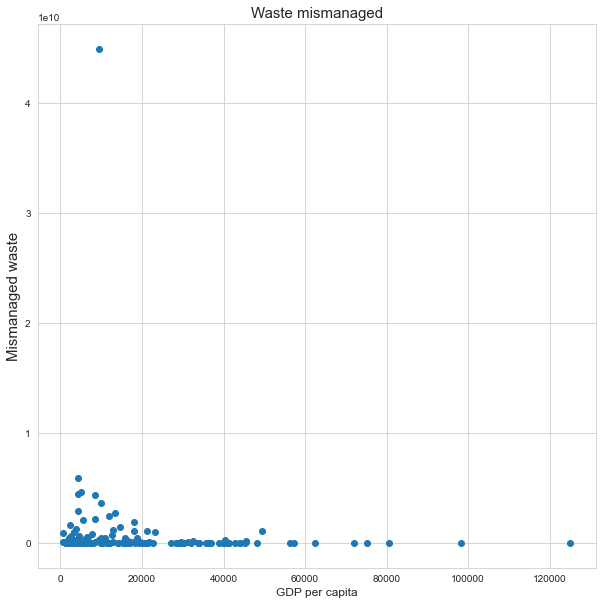

In [75]:
plt.figure(1, figsize=(10,10))
plt.scatter(df_plastic_waste['GDP per capita in PPP'], df_plastic_waste['Total waste mismanaged(kgs/year)'])
plt.title("Waste mismanaged",loc='center', fontsize=15)
plt.ylabel('Mismanaged waste', loc='center', fontsize=15)
plt.xlabel('GDP per capita', fontsize=12)
plt.show()

<AxesSubplot:xlabel='GDP per capita in PPP', ylabel='Mismanaged waste per person(kg/day)'>

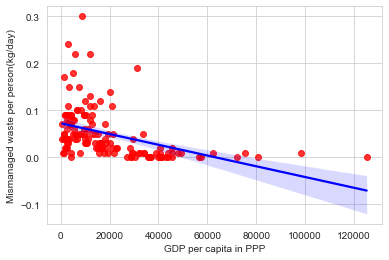

In [78]:
sns.regplot(x='GDP per capita in PPP', y='Mismanaged waste per person(kg/day)', data=df_plastic_waste,
           scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})

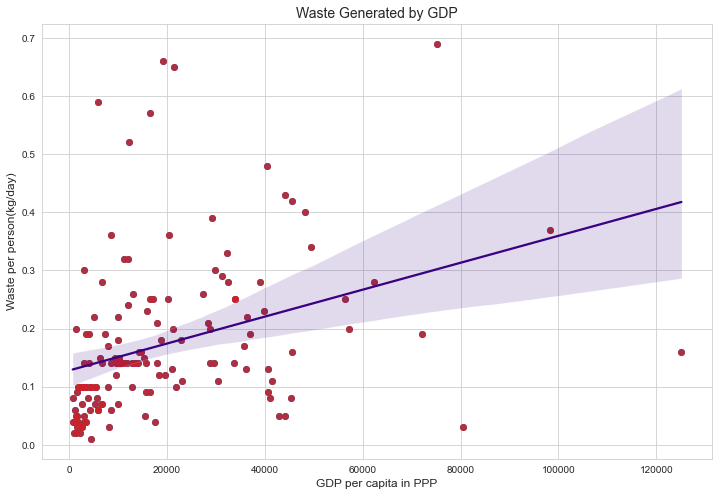

In [79]:
plt.figure(2, figsize=(12,8))
plt.scatter(df_plastic_waste['GDP per capita in PPP'], df_plastic_waste['Waste per person(kg/day)'])
plt.title('Waste Generated by GDP', loc='center', fontsize=14)
plt.ylabel('Waste per person(kg/day)', loc='center', fontsize=12)
plt.xlabel('GDP per capita in PPP', fontsize=12)

sns.regplot(x=df_plastic_waste['GDP per capita in PPP'], y=df_plastic_waste['Waste per person(kg/day)'],
           scatter_kws={'color': '#CD212A'}, line_kws={'color': '#380282'})

plt.show()